In [2]:
%pip install opencv-python
%pip install numpy
%pip install matplotlib
%pip install ipympl
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

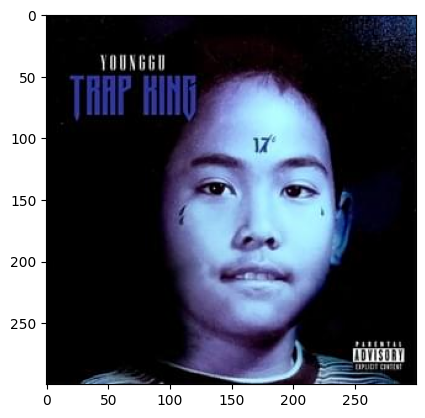

In [4]:
### START CODE HERE ###
img = cv2.imread("./assets/TrapKing.jpg")


plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [5]:
### START CODE HERE ###
def plot_histogram(image, channel):
    hist = cv2.calcHist([image], [channel], None, [256], [0, 256])
    return hist


### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

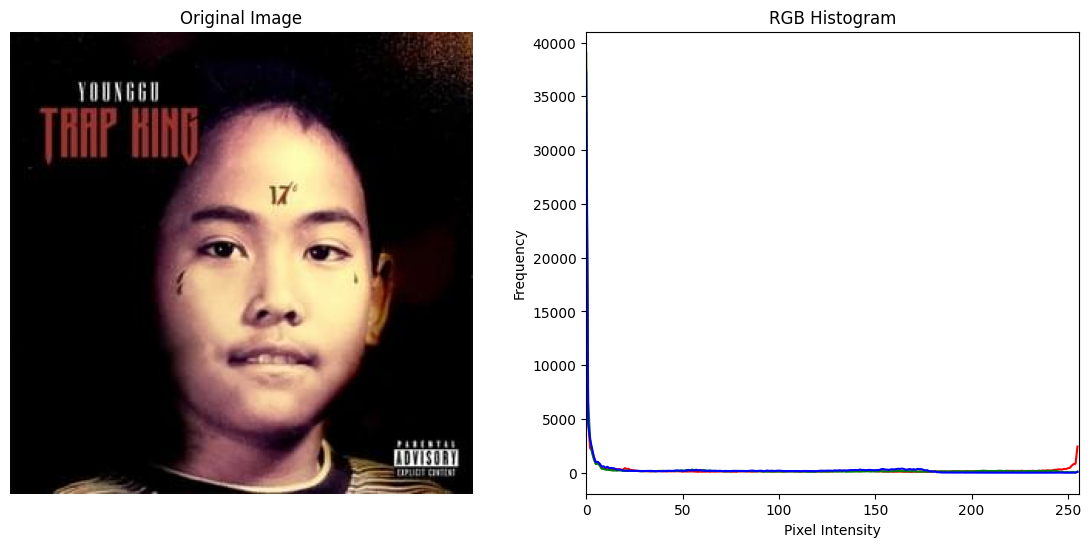

In [6]:
### START CODE HERE ###
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

colors = ("r", "g", "b")

for i, color in enumerate(colors):
    hist = plot_histogram(img_rgb, i)
    axs[1].plot(hist, color=color, label=color.upper())


axs[1].set_title("RGB Histogram")
axs[1].set_xlabel("Pixel Intensity")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim([0, 256])

plt.show()


### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

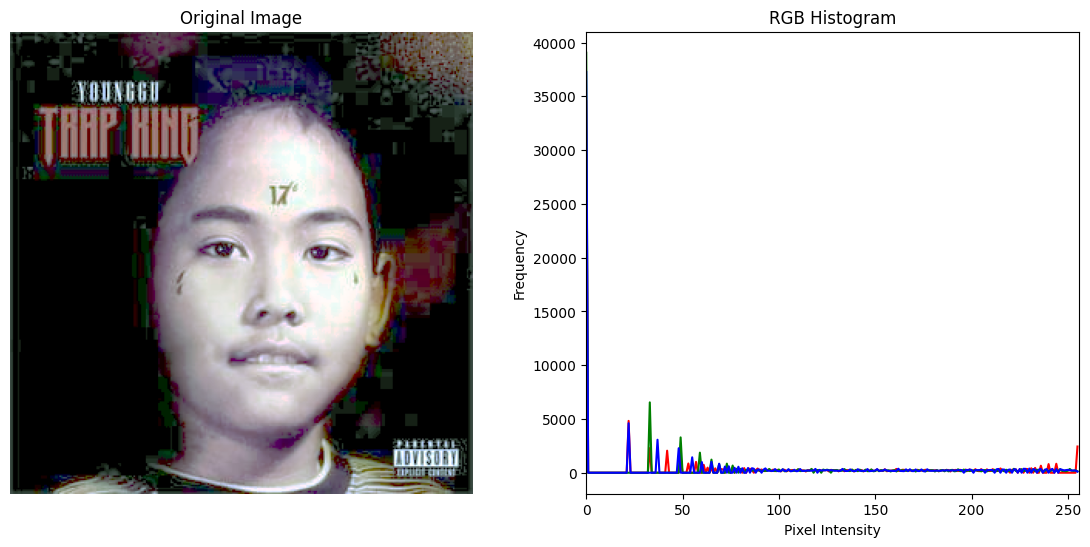

In [7]:
### START CODE HERE ###
channels = cv2.split(img_rgb)
eq_channels = [cv2.equalizeHist(ch) for ch in channels]
eq_img = cv2.merge(eq_channels)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].imshow(eq_img)
axs[0].set_title("Original Image")
axs[0].axis("off")

colors = ("r", "g", "b")

for i, color in enumerate(colors):
    hist = plot_histogram(eq_img, i)
    axs[1].plot(hist, color=color, label=color.upper())


axs[1].set_title("RGB Histogram")
axs[1].set_xlabel("Pixel Intensity")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim([0, 256])

plt.show()

### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [8]:
### START CODE HERE ###


img1 = cv2.imread("./assets/seaside.png")
img2 = cv2.imread("./assets/tusnami.png")


### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

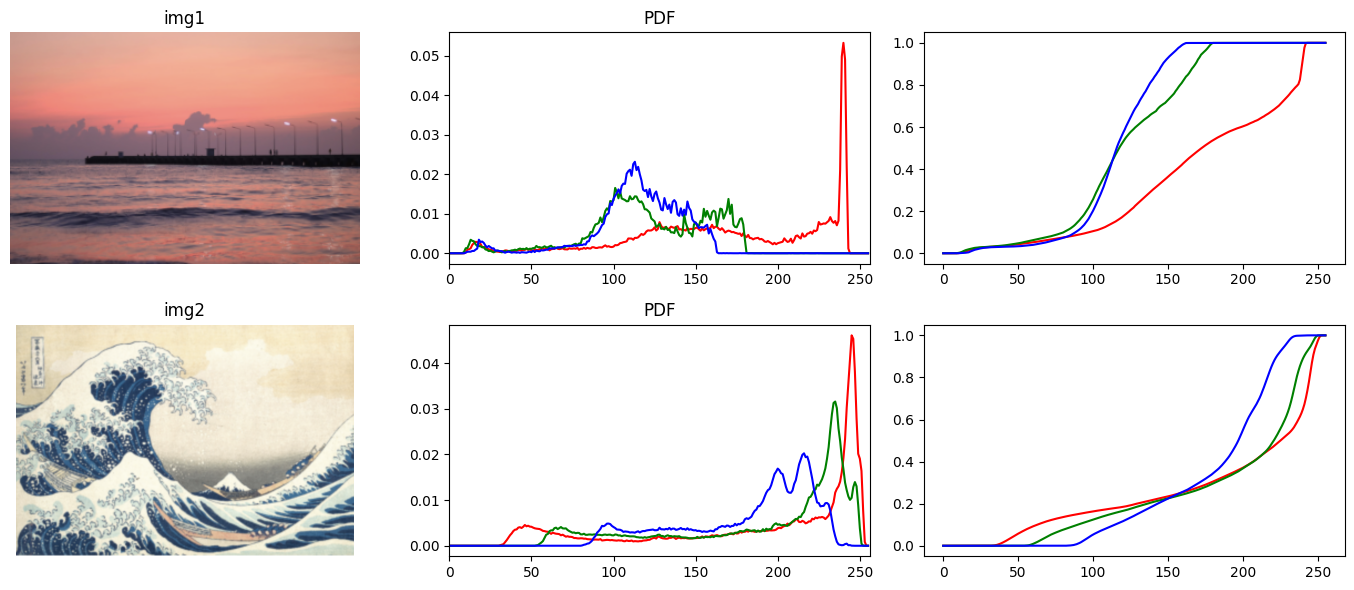

In [23]:
### START CODE HERE ###

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2, 3, figsize=(14, 6))


axs[0, 0].imshow(img1_rgb)
axs[0, 0].set_title("img1")
axs[0, 0].axis("off")

colors = ("r", "g", "b")

for i, color in enumerate(colors):
    hist = plot_histogram(img1_rgb, i)
    pdf_norm = hist / np.sum(hist)
    cdf = np.cumsum(hist)
    cdf_norm = cdf / cdf[-1]
    axs[0, 2].plot(cdf_norm, color=color, label=color.upper())
    axs[0, 1].plot(pdf_norm, color=color, label=color.upper())

axs[0, 1].set_title("PDF")
axs[0, 1].set_xlim([0, 256])


axs[1, 0].imshow(img2_rgb)
axs[1, 0].set_title("img2")
axs[1, 0].axis("off")

for i, color in enumerate(colors):
    hist = plot_histogram(img2_rgb, i)
    pdf_norm = hist / np.sum(hist)
    cdf = np.cumsum(hist)
    cdf_norm = cdf / cdf[-1]
    axs[1, 2].plot(cdf_norm, color=color, label=color.upper())
    axs[1, 1].plot(pdf_norm, color=color, label=color.upper())

axs[1, 1].set_title("PDF")
axs[1, 1].set_xlim([0, 256])
plt.tight_layout()
plt.show()


### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

In [27]:
def _match_cumulative_cdf(source, template):
    """
    Return modified source array so that the cumulative density function of
    its values matches the cumulative density function of the template.
    """
    if source.dtype.kind == "u":
        src_lookup = source.reshape(-1)
        src_counts = np.bincount(src_lookup)
        tmpl_counts = np.bincount(template.reshape(-1))

        # omit values where the count was 0
        tmpl_values = np.nonzero(tmpl_counts)[0]
        tmpl_counts = tmpl_counts[tmpl_values]
    else:
        src_values, src_lookup, src_counts = np.unique(
            source.reshape(-1), return_inverse=True, return_counts=True
        )
        tmpl_values, tmpl_counts = np.unique(template.reshape(-1), return_counts=True)

    # calculate normalized quantiles for each array
    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size

    interp_a_values = np.interp(src_quantiles, tmpl_quantiles, tmpl_values)
    return interp_a_values[src_lookup].reshape(source.shape)


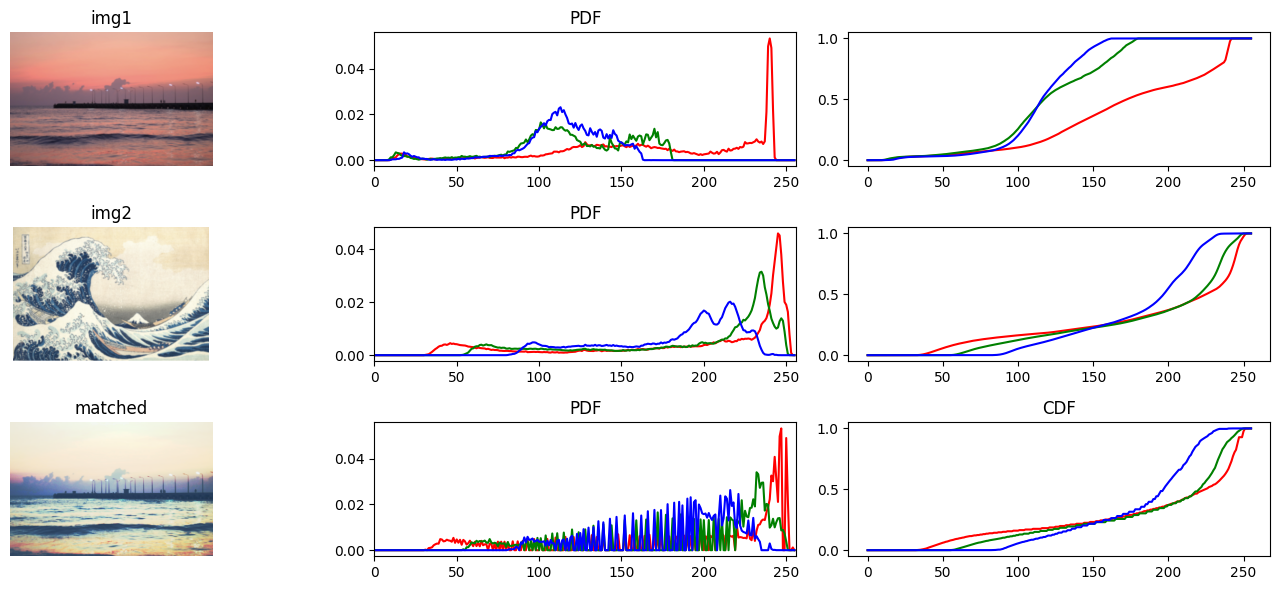

In [28]:
### START CODE HERE ###

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(3, 3, figsize=(14, 6))

matched = np.zeros_like(img1_rgb)
for i in range(3):  # R, G, B
    matched[..., i] = _match_cumulative_cdf(img1_rgb[..., i], img2_rgb[..., i]).astype(np.uint8)


axs[0, 0].imshow(img1_rgb)
axs[0, 0].set_title("img1")
axs[0, 0].axis("off")

colors = ("r", "g", "b")

for i, color in enumerate(colors):
    hist = plot_histogram(img1_rgb, i)
    pdf_norm = hist / np.sum(hist)
    cdf = np.cumsum(hist)
    cdf_norm = cdf / cdf[-1]
    axs[0, 2].plot(cdf_norm, color=color, label=color.upper())
    axs[0, 1].plot(pdf_norm, color=color, label=color.upper())

axs[0, 1].set_title("PDF")
axs[0, 1].set_xlim([0, 256])


axs[1, 0].imshow(img2_rgb)
axs[1, 0].set_title("img2")
axs[1, 0].axis("off")

for i, color in enumerate(colors):
    hist = plot_histogram(img2_rgb, i)
    pdf_norm = hist / np.sum(hist)
    cdf = np.cumsum(hist)
    cdf_norm = cdf / cdf[-1]
    axs[1, 2].plot(cdf_norm, color=color, label=color.upper())
    axs[1, 1].plot(pdf_norm, color=color, label=color.upper())

axs[1, 1].set_title("PDF")
axs[1, 1].set_xlim([0, 256])

axs[2, 0].imshow(matched)
axs[2, 0].set_title("matched")
axs[2, 0].axis("off")

for i, color in enumerate(colors):
    hist = plot_histogram(matched, i)
    pdf_norm = hist / np.sum(hist)
    cdf = np.cumsum(hist)
    cdf_norm = cdf / cdf[-1]
    axs[2, 1].plot(pdf_norm, color=color)
    axs[2, 2].plot(cdf_norm, color=color)

axs[2, 1].set_title("PDF")
axs[2, 1].set_xlim([0, 256])
axs[2, 2].set_title("CDF")

plt.tight_layout()
plt.show()


### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

## **Answer**
1. Picture that's too bright or overexposed
2. Choose a template image with well-balanced color distribution across all channels
3. Use equalization techniques to match the color distribution of the target image to the reference template